# Logistic Regression

### data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [3]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

### Age, EstimatedSalary 를 변수로 선택

In [4]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

dataset 을 Training 과 Test set 으로 분리

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

### train data 로 fit 하고, test data 는 train data 의 분포에 맞추어 transform

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [7]:
print(X_train.shape)

(320, 2)


### Training set 에 대해 Logistic Regression model 을 fitting

In [8]:
lr_classifier = LogisticRegression(solver='lbfgs', random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### predict

- predict() - 예측된 class 반환 using X_test
- predict_proba() - class 당 probability 반환 using X_test

In [9]:
y_pred = lr_classifier.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1.]

Test set true counts =  22.0
predicted true counts =  18.0
accuracy = 0.93


In [10]:
y_pred_proba = lr_classifier.predict_proba(X_test)

print(y_pred_proba[:5])
print()
print(y_pred_proba[:,1][:5])

[[0.87397564 0.12602436]
 [0.82308938 0.17691062]
 [0.7922792  0.2077208 ]
 [0.89908522 0.10091478]
 [0.89298557 0.10701443]]

[0.12602436 0.17691062 0.2077208  0.10091478 0.10701443]


In [11]:
y_pred_proba_1 = y_pred_proba[:, 1]

THRESHOLD = 0.5
print("Counts of y_predicted as 1 with threshold {} : ".format(THRESHOLD), sum(y_pred_proba_1 > THRESHOLD))

THRESHOLD = 0.6
print("Counts of y_predicted as 1 with threshold {} : ".format(THRESHOLD), sum(y_pred_proba_1 > THRESHOLD))

Counts of y_predicted as 1 with threshold 0.5 :  18
Counts of y_predicted as 1 with threshold 0.6 :  16


## confusion matrix 를 이용한 model 평가

In [12]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [13]:
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred))
print()
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, labels=[1, 0])))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, labels=[1, 0])))

confution matrix
 [[17  5]
 [ 1 57]]

f1 score
 0.85

Accuracy: 0.93
Precision: 0.94
Recall: 0.77


confution matrix
 [[17  5]
 [ 1 57]]


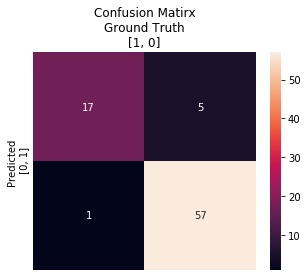

In [14]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns

cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=False, yticklabels=False)
ax.set_ylabel('Predicted\n [0, 1]')
ax.set_title('Confusion Matirx\nGround Truth\n[1, 0]')
None

In [15]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, labels=[1, 0])))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, labels=[1, 0])))
print("f1 score\n", f1_score(y_test, y_pred))

Accuracy: 0.93
Precision: 0.94
Recall: 0.77
f1 score
 0.85
